# Machine Learning -  Project

#### Omar Mohamed Lotfy 18P5606
#### Laila Mohamed Aborizka 18P9654

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#common imports 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

## Reading data

In [3]:
# Load the data and show it
df =pd.read_csv("data.csv",index_col=0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


Since the country and location are both Nominal data and we want to remove any preferences due to using integer values so we are going to ONE HOT ENCODE these two columns  

## One Hot Encoding

In [4]:
# Finding number of unique labels for each feature 
for column in df.columns:
    print(column, '->', len(df[column].unique()))


location -> 139
country -> 34
gender -> 3
age -> 81
vis_wuhan -> 2
from_wuhan -> 2
symptom1 -> 25
symptom2 -> 32
symptom3 -> 20
symptom4 -> 13
symptom5 -> 4
symptom6 -> 2
diff_sym_hos -> 18
result -> 2


In [5]:
# One Hot Encode (location , country)
pd.get_dummies(df.iloc[:, 0:2], drop_first=True).shape

(863, 2)

In [6]:
# Top locations
df.location.value_counts().sort_values(ascending=False).head(20)

108    85
45     78
44     43
114    37
110    33
99     31
106    31
116    22
85     21
117    21
135    19
13     18
78     18
51     17
121    17
10     17
12     15
128    12
19     11
9      11
Name: location, dtype: int64

In [7]:
# Top countries
df.country.value_counts().sort_values(ascending=False).head(20)

18    172
8     155
13     90
24     86
12     54
29     37
11     35
28     33
25     32
23     31
30     17
4      17
32     15
15     14
31     14
2      11
7      10
19      9
33      8
21      4
Name: country, dtype: int64

In [8]:
# List top locations
top_locations = [x for x in df.location.value_counts().sort_values(ascending=False).head(20).index]
print(top_locations)

[108, 45, 44, 114, 110, 99, 106, 116, 85, 117, 135, 13, 78, 51, 121, 10, 12, 128, 19, 9]


In [9]:
for label in top_locations:
    df["L"+str(int(label))]=np.where(df['location']==label,1,0)

In [10]:
# List top countries
top_countries = [y for y in df.country.value_counts().sort_values(ascending=False).head(20).index]
print(top_countries)

[18, 8, 13, 24, 12, 29, 11, 28, 25, 23, 30, 4, 32, 15, 31, 2, 7, 19, 33, 21]


In [11]:
pd.set_option('display.max_columns', 100)
for label in top_countries:
    df["C"+str(int(label))]=np.where(df['country']==label,1,0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result,L108,L45,L44,L114,L110,L99,L106,L116,L85,L117,L135,L13,L78,L51,L121,L10,L12,L128,L19,L9,C18,C8,C13,C24,C12,C29,C11,C28,C25,C23,C30,C4,C32,C15,C31,C2,C7,C19,C33,C21
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df=df.drop(['country'],axis=1)
df=df.drop(['location'],axis=1)
df.head()

,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result,L108,L45,L44,L114,L110,L99,L106,L116,L85,L117,L135,L13,L78,L51,L121,L10,L12,L128,L19,L9,C18,C8,C13,C24,C12,C29,C11,C28,C25,C23,C30,C4,C32,C15,C31,C2,C7,C19,C33,C21
0,1,66.0,1,0,14,31,19,12,3,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,56.0,0,1,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,46.0,0,1,14,31,19,12,3,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,60.0,1,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,58.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Arranging the columns 
cols = df.columns.tolist()
cols = cols[12:52] + cols[0:12]
df = df[cols]
df.head()

,L108,L45,L44,L114,L110,L99,L106,L116,L85,L117,L135,L13,L78,L51,L121,L10,L12,L128,L19,L9,C18,C8,C13,C24,C12,C29,C11,C28,C25,C23,C30,C4,C32,C15,C31,C2,C7,C19,C33,C21,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,66.0,1,0,14,31,19,12,3,1,8,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56.0,0,1,14,31,19,12,3,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46.0,0,1,14,31,19,12,3,1,13,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,1,0,14,31,19,12,3,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,58.0,0,0,14,31,19,12,3,1,0,0


In [14]:
# divide data 
X=df.iloc[:,:-1].values
Y=df['result']
#X
#Y

## Visualizations

Data visualization


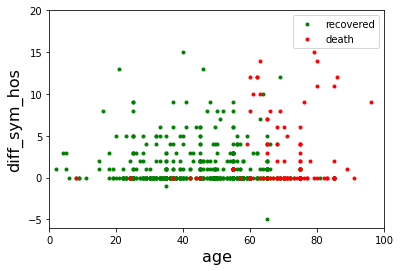

In [15]:
# Visualizing data 
# using two important features : age and diff_sym_hos 
print('Data visualization')
plt.plot(X[Y==0,41],X[Y==0,50],'g.')
plt.plot(X[Y==1,41],X[Y==1,50],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-6,20)
plt.xlim(0,100)
plt.legend(['recovered','death'],loc='upper right')

Data visualization
Here is a classification idea based on two linear constraints.


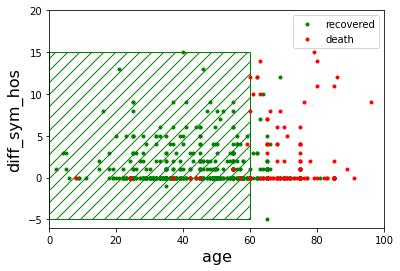

In [16]:
# classification idea!
from matplotlib import patches
print('Data visualization')
plt.plot(X[Y==0,41],X[Y==0,50],'g.')
plt.plot(X[Y==1,41],X[Y==1,50],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-6,20)
plt.xlim(0,100)
plt.legend(['recovered','death'],loc='upper right')
ax = plt.gca()
ax.add_patch(
    patches.Rectangle(
        (0, -5),   # (x,y)
        width=60, height=20,  color='green',
        fill=False, hatch = '//'
    )
)
print('Here is a classification idea based on two linear constraints.')

## Normalization

The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. Normalization is also required for some algorithms to model the data correctly.

In [17]:
from sklearn.preprocessing import StandardScaler
Normalized = StandardScaler()
Normalized.fit(X)
X = Normalized.transform(X)

# -----KNN CLASSIFIER-----

## Feature Selection KNN


Feature selection enables the machine learning algorithm to train faster. It reduces the complexity of a model and makes it easier to interpret. As well as improving the accuracy of a model if the right features are chosen.

- We used Univariate feature selection with k=13.
- We reached 13 by trial and error (trying different values for k) and 13 provided the most accurate knn model. 
- We used f_classif beacause it is not affected by -ve values unlike chi2.

In [18]:
np.set_printoptions(threshold=np.inf)
print("Before feature selection --> dimensions")
print(X.shape)
X_knn = SelectKBest(f_classif , k=13).fit_transform(X,Y) 
#features selected are 
#1 (L45)
#9 (L117)
#20 (C18)
#22 (C13)
#24 (C12)
#35 (C2)
#41 (age)
#42 (vis_wuhan)
#43 (from_wuhan)
#44 (symptom1)
#45 (symptom2)
#47 (symptom4)
#50 (diff_sym_hos)
print("After feature selection --> dimensions")
print(X_knn.shape)
#X_knn=X[:,[1,9,20,22,24,35,41,42,43,44,45,47,50]] 

Before feature selection --> dimensions
(863, 51)
After feature selection --> dimensions
(863, 13)


## Splitting the data



In [19]:
# 80% training
# 20% test
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, Y, test_size=0.20,random_state=3)

#### Since this is a small dataset we are going to use K-fold Cross Validation

Also we do not know which k is best for our classification model so using a for loop we are going to try several k and calculate accuracy then decide which k is best  

The optimal number of neighbors is 3.


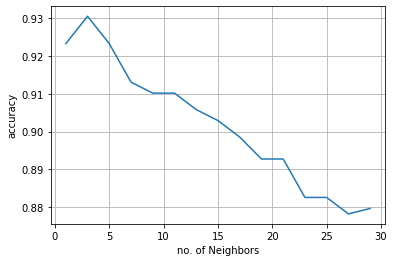

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# creating odd list of K for KNN
k_List = list(range(0,30))
neighbors = list(filter(lambda x: x % 2 != 0, k_List))

# list that will hold accuracy 
acc_score = []

# Perform 10-fold cross validation.
# Crossvalscore evaluates a score by cross-validation 
# and returns an array of scores of the estimator (knn) for each run of the cross validation.
# Cross_val_score takes parameters the data to fit, labels, int to determine cross-validation splitting strategy
# and scoring (a str to determine model evaluation criteria)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    acc_scores = cross_val_score(knn, x_train_knn, y_train_knn, cv=10, scoring='accuracy')
    acc_score.append(acc_scores.mean())

# determining best k (k that provided maximum accuracy)
best_k = neighbors[acc_score.index(max(acc_score))]
print('The optimal number of neighbors is %d.' % best_k)

# plot accuracy vs k 
plt.plot(neighbors, acc_score)
plt.xlabel('no. of Neighbors')
plt.ylabel('accuracy')
plt.grid()
plt.show()

#### Train model on best k

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(x_train_knn, y_train_knn)
y_pred_knn = knn_classifier.predict(x_test_knn)

## Visualizations

Data visualization of original test data


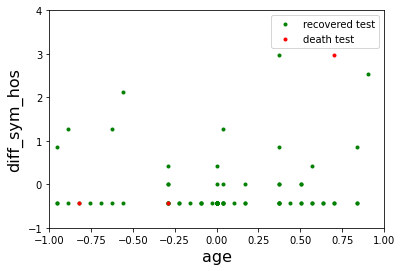

In [22]:
#plot original data
print('Data visualization of original test data')
plt.plot(x_test_knn[y_test_knn==0,6],x_test_knn[y_test_knn==0,12],'g.')
plt.plot(x_test_knn[y_test_knn==1,6],x_test_knn[y_test_knn==1,12],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-1,4)
plt.xlim(-1,1)
plt.legend(['recovered test','death test'],loc='upper right')

Data visualization of predicted data


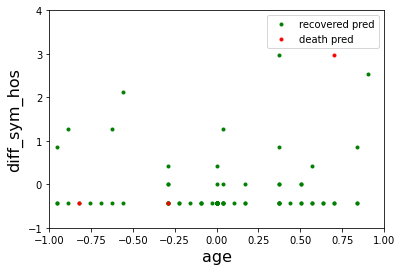

In [23]:
#plot predicted data
print('Data visualization of predicted data')
plt.plot(x_test_knn[y_pred_knn==0,6],x_test_knn[y_pred_knn==0,12],'g.')
plt.plot(x_test_knn[y_pred_knn==1,6],x_test_knn[y_pred_knn==1,12],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-1,4)
plt.xlim(-1,1)
plt.legend(['recovered pred','death pred'],loc='upper right')

KNN boundary for k = 3


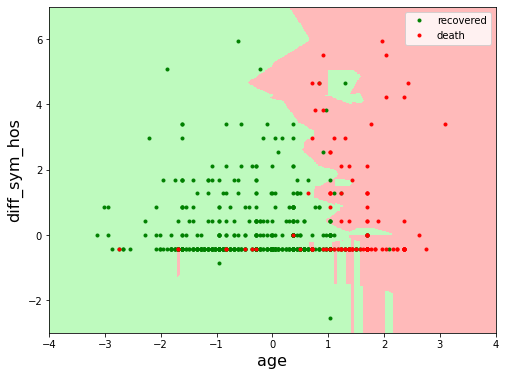

In [24]:
# KNN Boundary Visualization 
from sklearn import neighbors
print ('KNN boundary for k = %d' % best_k)
# object generated from a list of colors (red,green)
cmap_light = ListedColormap(['#befabe','#ffbaba' ])
clf = neighbors.KNeighborsClassifier(best_k)
# taking two features only to be able to plot them
clf.fit(x_train_knn[:,[6,12]], y_train_knn)
age_min, age_max = X_knn[:, 6].min() - 1, X_knn[:, 6].max() + 1
diff_sym_hos_min, diff_sym_hos_max = X_knn[:, 12].min() - 1, X_knn[:, 12].max() + 1
# create a rectangular grid out of two given one-dimensional arrays (meshgrid)
# The two arrays are evenly spaced values within a given interval (one for age and one for diff_sym_hos with step 0.02).
age, sym = np.meshgrid(np.arange(age_min, age_max, 0.02),np.arange(diff_sym_hos_min, diff_sym_hos_max, 0.02))
# predict each point 
Z = clf.predict(np.c_[age.ravel(), sym.ravel()])
Z = Z.reshape(age.shape)
plt.figure(figsize=(8, 6))
# colormap the values (Z) based on the colors in the cmap (red for death region and green for recovered region) 
plt.pcolormesh(age, sym, Z, cmap=cmap_light,shading='auto')
plt.plot(X_knn[Y==0,6],X_knn[Y==0,12],'g.')
plt.plot(X_knn[Y==1,6],X_knn[Y==1,12],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-3,7)
plt.xlim(-4,4)
plt.legend(['recovered','death'],loc='upper right')
plt.show()

## Model Evaluation 

For a binary classification problem, we would have a 2 x 2 matrix 

                                        TN | FP
                                        -------
                                        FN | TP
                                       

In [25]:
print(confusion_matrix(y_test_knn, y_pred_knn))

[[154   1]
 [  3  15]]


- Precision refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives).

$$
    Precision = \frac{TP}{TP + FP}.
$$

- Recall is the measure of our model correctly identifying True Positives.It is the number of true positives divided by (the number of true positives plus the number of false negatives).

$$
    Recall = \frac{TP}{TP + FN}.
$$

- F1 score: Precision and Recall are the two building blocks of the F1 score. The goal of the F1 score is to combine the precision and recall metrics into a single metric.The F1 score is defined as the harmonic mean of precision and recall.

$$
    F1 = \frac{2 * precision * recall}{precision + recall}.
$$




In [26]:
# calculate accuracy
knn_accuracy = accuracy_score(y_test_knn, y_pred_knn)
print('Accuracy: %.3f' % knn_accuracy)
# calculate precision
knn_precision = precision_score(y_test_knn, y_pred_knn, average='binary')
print('Precision: %.3f' % knn_precision)
# calculate recall
knn_recall = recall_score(y_test_knn, y_pred_knn, average='binary')
print('Recall: %.3f' % knn_recall)
# calculate f1-score
knn_f1_score = f1_score(y_test_knn, y_pred_knn, average='binary')
print('F-Measure: %.3f' % knn_f1_score)

Accuracy: 0.977
Precision: 0.938
Recall: 0.833
F-Measure: 0.882


The ROC curve shows the trade-off between sensitivity (or TPR) and FPR (1 – specificity). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
To compare different classifiers, it can be useful to summarize the performance of each classifier into a single measure. One common approach is to calculate the area under the ROC curve, which is abbreviated to AUC.

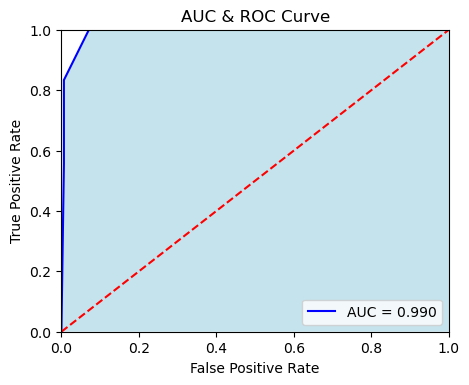

In [27]:
# plotting ROC using tpr, fpr 

# predict probabilities
y_score_knn = knn_classifier.predict_proba(x_test_knn)
# keep probabilities for the positive outcome only (death) because this is the parameter to be given to roc_curve
y_score_knn = y_score_knn[:, 1]
#calculate
fpr, tpr, threshold =  metrics.roc_curve(y_test_knn, y_score_knn)
#calculate auc
auc = metrics.roc_auc_score(y_test_knn, y_score_knn)
#plot
plt.figure(figsize=(5, 4), dpi=100)
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % auc)
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# -----LOGISTIC CLASSIFIER -----

## Feature Selection Logistic

In [28]:
print("Before feature selection --> dimensions")
print(X.shape)
X_log = SelectKBest(f_classif , k=20).fit_transform(X,Y) 
#features selected are 
#1 (L45)
#2 (L44)
#8 (L85)
#9 (L117)
#20 (C18)
#21 (C8)
#22 (C13)
#23 (C24)
#24 (C12)
#26 (C11)
#35 (C2)
#41 (age)
#42 (vis_wuhan)
#43 (from_wuhan)
#44 (symptom1)
#45 (symptom2)
#46 (symptom3)
#47 (symptom4)
#50 (diff_sym_hos)
print("After feature selection --> dimensions")
print(X_log.shape)

Before feature selection --> dimensions
(863, 51)
After feature selection --> dimensions
(863, 20)


## Splitting the data 

In [29]:
# 80% training
# 20% test
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(X_log, Y, test_size=0.20,random_state=3)

## CV check

In [30]:
from sklearn.linear_model import LogisticRegression
# checking accuracy of model without choosing parameters 
model = LogisticRegression()
# Perform 10-fold cross validation.
# Crossvalscore evaluates a score by cross-validation 
# and returns an array of scores of the estimator (model) for each run of the cross validation.
# Cross_val_score takes parameters the data to fit, labels, int to determine cross-validation splitting strategy
# and scoring (a str to determine model evaluation criteria)
scores = model_selection.cross_val_score(model, x_train_log, y_train_log, cv=10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print("10-fold cross validation average accuracy: %.3f" % (scores.mean()))

Cross-validation scores:[0.95652174 0.98550725 0.97101449 0.91304348 0.98550725 0.97101449
 0.97101449 0.97101449 0.95652174 0.95652174]
10-fold cross validation average accuracy: 0.964


##### We are going to perform a GridSearchCV to find optimum hyperparameters!
#### it is an exhaustive search over specified parameter values for an estimator.

#### Grid Search with 10 folds

In [31]:
# Grid search for getting optimum parameters

# list that holds parameter values
# solver is assigned to liblinear because it functions with both penalties l1 and l2
# C: inverse of regularization strength (C=1/λ)
# penalty: specify the norm used in the penalization (regularization)
# solver: Algorithm to use in the optimization problem
# solver is assigned to liblinear because it functions with both penalties l1 and l2 also bec dataset is small.
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000], 'solver':['liblinear']}
# model CV
clf=LogisticRegression()
clf_cv=GridSearchCV(clf,grid_values,cv=10)
clf_cv.fit(x_train_log,y_train_log)
#printing best parameters and the accuracy of that model 
print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
print("accuracy :",clf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.9710144927536233


##### We can see that choosing the right parameters resulted in better accuracy

## Implementing the model

In [32]:
# instantiate the model 
log_classifier = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')

# fit the model with data
log_classifier.fit(x_train_log,y_train_log)

y_pred_log=log_classifier.predict(x_test_log)

# Measure accuracy on test data 
acc = np.mean(y_pred_log == y_test_log)
print("Accuracy on test data = %.3f" % acc)

Accuracy on test data = 0.960


## Visualizations

Data visualization of original test data


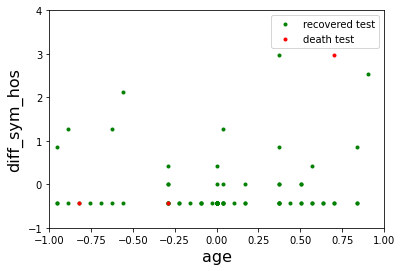

In [33]:
#plot original data
print('Data visualization of original test data')
plt.plot(x_test_log[y_test_log==0,12],x_test_log[y_test_log==0,19],'g.')
plt.plot(x_test_log[y_test_log==1,12],x_test_log[y_test_log==1,19],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-1,4)
plt.xlim(-1,1)
plt.legend(['recovered test','death test'],loc='upper right')

Data visualization of predicted data


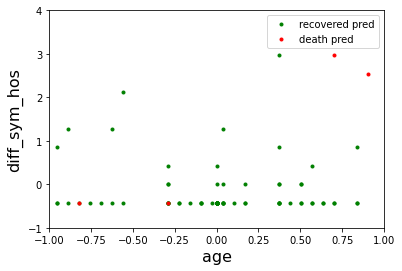

In [34]:
#plot predicted data
print('Data visualization of predicted data')
plt.plot(x_test_log[y_pred_log==0,12],x_test_log[y_pred_log==0,19],'g.')
plt.plot(x_test_log[y_pred_log==1,12],x_test_log[y_pred_log==1,19],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-1,4)
plt.xlim(-1,1)
plt.legend(['recovered pred','death pred'],loc='upper right')

Logistic boundary for data


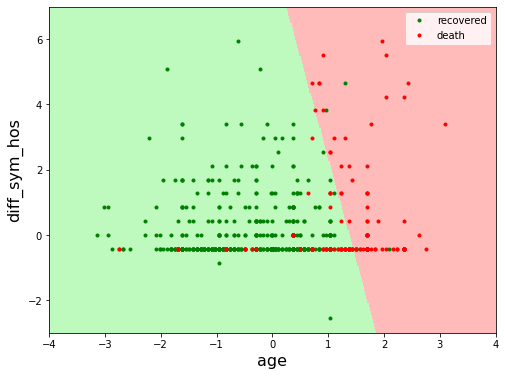

In [35]:
# logistic decision boundary visualization
# this code (plotting boundaries) is explained in details in the knn classifier
print ('Logistic boundary for data')
cmap_light = ListedColormap(['#befabe','#ffbaba' ])
clf = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
clf.fit(x_train_log[:,[12,19]], y_train_log)
age_min, age_max = X_log[:, 12].min() - 1, X_log[:, 12].max() + 1
diff_sym_hos_min, diff_sym_hos_max = X_log[:, 19].min() - 1, X_log[:, 19].max() + 1
age, sym = np.meshgrid(np.arange(age_min, age_max, 0.02),np.arange(diff_sym_hos_min, diff_sym_hos_max, 0.02))
Z = clf.predict(np.c_[age.ravel(), sym.ravel()])
Z = Z.reshape(age.shape)
plt.figure(figsize=(8, 6))
plt.pcolormesh(age, sym, Z, cmap=cmap_light,shading='auto')
plt.plot(X_log[Y==0,12],X_log[Y==0,19],'g.')
plt.plot(X_log[Y==1,12],X_log[Y==1,19],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-3,7)
plt.xlim(-4,4)
plt.legend(['recovered','death'],loc='upper right')
plt.show()

## Model Evaluation 

For a binary classification problem, we would have a 2 x 2 matrix 

                                        TN | FP
                                        -------
                                        FN | TP
                                       

In [36]:
print(confusion_matrix(y_test_log, y_pred_log))

[[151   4]
 [  3  15]]


- Precision refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives).

$$
    Precision = \frac{TP}{TP + FP}.
$$

- Recall is the measure of our model correctly identifying True Positives.It is the number of true positives divided by (the number of true positives plus the number of false negatives).

$$
    Recall = \frac{TP}{TP + FN}.
$$

- F1 score: Precision and Recall are the two building blocks of the F1 score. The goal of the F1 score is to combine the precision and recall metrics into a single metric.The F1 score is defined as the harmonic mean of precision and recall.

$$
    F1 = \frac{2 * precision * recall}{precision + recall}.
$$




In [37]:
# calculate accuracy
log_accuracy = accuracy_score(y_test_log, y_pred_log)
print('Accuracy: %.3f' % log_accuracy)
# calculate precision
log_precision = precision_score(y_test_log, y_pred_log, average='binary')
print('Precision: %.3f' % log_precision)
# calculate recall
log_recall = recall_score(y_test_log, y_pred_log, average='binary')
print('Recall: %.3f' % log_recall)
# calculate f1-score
log_f1_score = f1_score(y_test_log, y_pred_log, average='binary')
print('F-Measure: %.3f' % log_f1_score)

Accuracy: 0.960
Precision: 0.789
Recall: 0.833
F-Measure: 0.811


The ROC curve shows the trade-off between sensitivity (or TPR) and FPR (1 – specificity). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
To compare different classifiers, it can be useful to summarize the performance of each classifier into a single measure. One common approach is to calculate the area under the ROC curve, which is abbreviated to AUC.

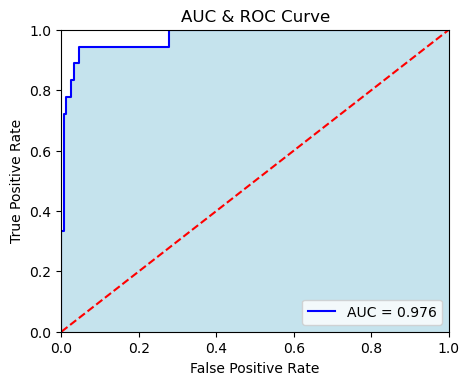

In [38]:
# plotting ROC using tpr, fpr 

# predict probabilities
y_score_log = log_classifier.predict_proba(x_test_log)
# keep probabilities for the positive outcome only (death) because this is parameter for roc_curve
y_score_log = y_score_log[:, 1]
#calculate
fpr, tpr, threshold =  metrics.roc_curve(y_test_log, y_score_log)
#calculate auc
auc = metrics.roc_auc_score(y_test_log, y_score_log)
#plot
plt.figure(figsize=(5, 4), dpi=100)
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % auc)
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(0.0, 1.0)

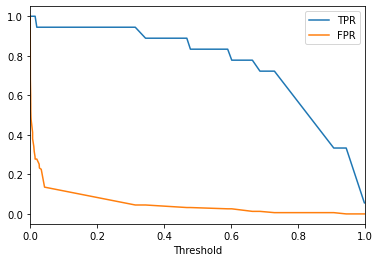

In [39]:
# graphing the relation between the threshold and the TPR and FPR
plt.plot(threshold,tpr, threshold,fpr)
plt.legend(['TPR','FPR'])
plt.xlabel('Threshold')
plt.xlim([0,1])


# -----BAYES CLASSIFIER-----

## Feature Selection Bayes


In [40]:
print("Before feature selection --> dimensions")
print(X.shape)
X_bay = SelectKBest(f_classif , k=12).fit_transform(X,Y) 
#features selected are 
#1 (L45)
#9 (L117)
#20 (C18)
#22 (C13)
#35 (C2)
#41 (age)
#42 (vis_wuhan)
#43 (from_wuhan)
#44 (symptom1)
#45 (symptom2)
#47 (symptom4)
#50 (diff_sym_hos)
print("After feature selection --> dimensions")
print(X_bay.shape)

Before feature selection --> dimensions
(863, 51)
After feature selection --> dimensions
(863, 12)


## Splitting the data

In [41]:
# 80% training
# 20% test
x_train_bay, x_test_bay, y_train_bay, y_test_bay = train_test_split(X_bay, Y, test_size=0.20,random_state=3)

Data provided is continuous so we used gaussian NB

#### Model training

In [42]:
from sklearn.naive_bayes import GaussianNB
bay_classifier = GaussianNB()
bay_classifier.fit(x_train_bay, y_train_bay)

GaussianNB()

In [43]:
# calculate accuracy score of model 
y_pred_bay = bay_classifier.predict(x_test_bay)
accuracy_score(y_test_bay, y_pred_bay) 

0.9017341040462428

### CV check

In [44]:
# 10-fold CV 
# Perform 10-fold cross validation.
# Crossvalscore evaluates a score by cross-validation 
# and returns an array of scores of the estimator (bay_classifier) for each run of the cross validation.
# Cross_val_score takes parameters the data to fit, labels, int to determine cross-validation splitting strategy
# and scoring (a str to determine model evaluation criteria)
scores = cross_val_score(bay_classifier, x_train_bay, y_train_bay, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))
#Our original model accuracy is 0.9017, but the mean cross-validation accuracy is 0.8493. 
#So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

Cross-validation scores:[0.84057971 0.84057971 0.85507246 0.84057971 0.88405797 0.85507246
 0.82608696 0.84057971 0.84057971 0.86956522]
Average cross-validation score: 0.8493


### Check for overfitting

In [45]:
print('Training set score: {:.4f}'.format(bay_classifier.score(x_train_bay, y_train_bay)))
print('Test set score: {:.4f}'.format(bay_classifier.score(x_test_bay, y_test_bay)))
#The training-set accuracy score is 0.86 while the test-set accuracy to be 0.90. 
#These two values are quite comparable. So, there is no sign of overfitting.

Training set score: 0.8565
Test set score: 0.9017


## Visualizations

Data visualization of original test data


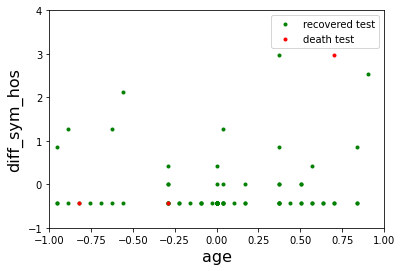

In [46]:
#plot original data
print('Data visualization of original test data')
plt.plot(x_test_bay[y_test_bay==0,5],x_test_bay[y_test_bay==0,11],'g.')
plt.plot(x_test_bay[y_test_bay==1,5],x_test_bay[y_test_bay==1,11],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-1,4)
plt.xlim(-1,1)
plt.legend(['recovered test','death test'],loc='upper right')

Data visualization of predicted data


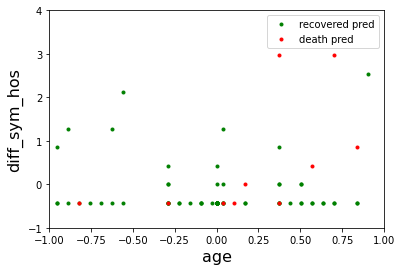

In [47]:
#plot predicted data
print('Data visualization of predicted data')
plt.plot(x_test_bay[y_pred_bay==0,5],x_test_bay[y_pred_bay==0,11],'g.')
plt.plot(x_test_bay[y_pred_bay==1,5],x_test_bay[y_pred_bay==1,11],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-1,4)
plt.xlim(-1,1)
plt.legend(['recovered pred','death pred'],loc='upper right')

## Model Evaluation 

For a binary classification problem, we would have a 2 x 2 matrix 

                                        TN | FP
                                        -------
                                        FN | TP
                                       

In [48]:
print(confusion_matrix(y_test_bay, y_pred_bay))

[[146   9]
 [  8  10]]


- Precision refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives).

$$
    Precision = \frac{TP}{TP + FP}.
$$

- Recall is the measure of our model correctly identifying True Positives.It is the number of true positives divided by (the number of true positives plus the number of false negatives).

$$
    Recall = \frac{TP}{TP + FN}.
$$

- F1 score: Precision and Recall are the two building blocks of the F1 score. The goal of the F1 score is to combine the precision and recall metrics into a single metric.The F1 score is defined as the harmonic mean of precision and recall.

$$
    F1 = \frac{2 * precision * recall}{precision + recall}.
$$




In [49]:
# calculate accuracy
bay_accuracy = accuracy_score(y_test_bay, y_pred_bay)
print('Accuracy: %.3f' % bay_accuracy)
# calculate precision
bay_precision = precision_score(y_test_bay, y_pred_bay, average='binary')
print('Precision: %.3f' % bay_precision)
# calculate recall
bay_recall = recall_score(y_test_bay, y_pred_bay, average='binary')
print('Recall: %.3f' % bay_recall)
# calculate f1-score
bay_f1_score = f1_score(y_test_bay, y_pred_bay, average='binary')
print('F-Measure: %.3f' % bay_f1_score)

Accuracy: 0.902
Precision: 0.526
Recall: 0.556
F-Measure: 0.541


The ROC curve shows the trade-off between sensitivity (or TPR) and FPR (1 – specificity). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
To compare different classifiers, it can be useful to summarize the performance of each classifier into a single measure. One common approach is to calculate the area under the ROC curve, which is abbreviated to AUC.

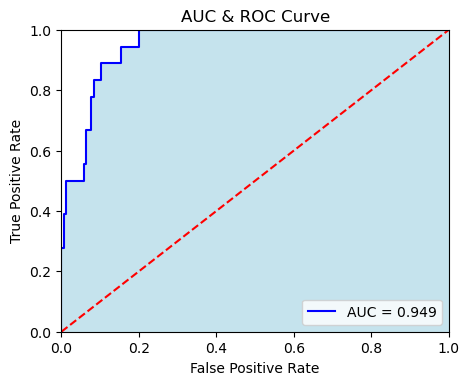

In [50]:
# plotting ROC using tpr, fpr 

# predict probabilities
y_score_bay = bay_classifier.predict_proba(x_test_bay)
# keep probabilities for the positive outcome only (death) because it is a parameter for roc_curve
y_score_bay = y_score_bay[:, 1]
#calculate
fpr, tpr, threshold =  metrics.roc_curve(y_test_bay, y_score_bay)
#calculate auc
auc = metrics.roc_auc_score(y_test_bay, y_score_bay)
#plot
plt.figure(figsize=(5, 4), dpi=100)
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % auc)
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# -----Decision Trees-----

## Feature Selection DT

In [51]:
print("Before feature selection --> dimensions")
print(X.shape)
X_tree = SelectKBest(f_classif , k=9).fit_transform(X,Y) 
#features selected are 
#1(L45)
#8(L85)
#22(C13)
#35(C2)
#41(age)
#42(vis_wuhan)
#43(from_wuhan)
#44(symptom1)
#50(diff_sym_hos)
print("After feature selection --> dimensions")
print(X_tree.shape)

Before feature selection --> dimensions
(863, 51)
After feature selection --> dimensions
(863, 9)


## Splitting Data 

In [52]:
# 80% training
# 20% test
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, Y, test_size=0.20,random_state=3)

## Entropy
#### finding the maximum depth using cross validation.

In [53]:
from sklearn.tree import DecisionTreeClassifier
Maxdepth_List = list(range(1,10))
score_tree = []
for m in Maxdepth_List:
    classifierTree = DecisionTreeClassifier(criterion="entropy",max_depth=m,random_state=3)
# Perform 10-fold cross validation.
# Crossvalscore evaluates a score by cross-validation 
# and returns an array of scores of the estimator (classifierTree) for each run of the cross validation.
# Cross_val_score takes parameters the data to fit, labels, int to determine cross-validation splitting strategy
# and scoring (a str to determine model evaluation criteria)
    scores_tree = cross_val_score(classifierTree, x_train_tree, y_train_tree, cv=10, scoring='accuracy')
    score_tree.append(scores_tree.mean())
print(score_tree)
best_depth = Maxdepth_List[score_tree.index(max(score_tree))]
print('\nThe optimal number of levels is %d.' % best_depth)

[0.8927536231884059, 0.9231884057971014, 0.9405797101449276, 0.9565217391304348, 0.9492753623188406, 0.9434782608695652, 0.9478260869565217, 0.9478260869565217, 0.946376811594203]

The optimal number of levels is 4.


#### Model training with depth 4 and using entropy

In [54]:
tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth,random_state=3)
tree_classifier.fit(x_train_tree, y_train_tree)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=3)

In [55]:
# calculate accuracy score of model 
y_pred_tree = tree_classifier.predict(x_test_tree)
accuracy_score(y_test_tree, y_pred_tree) 

0.9421965317919075

### Draw Decision Tree with depth 4 based on the features selected

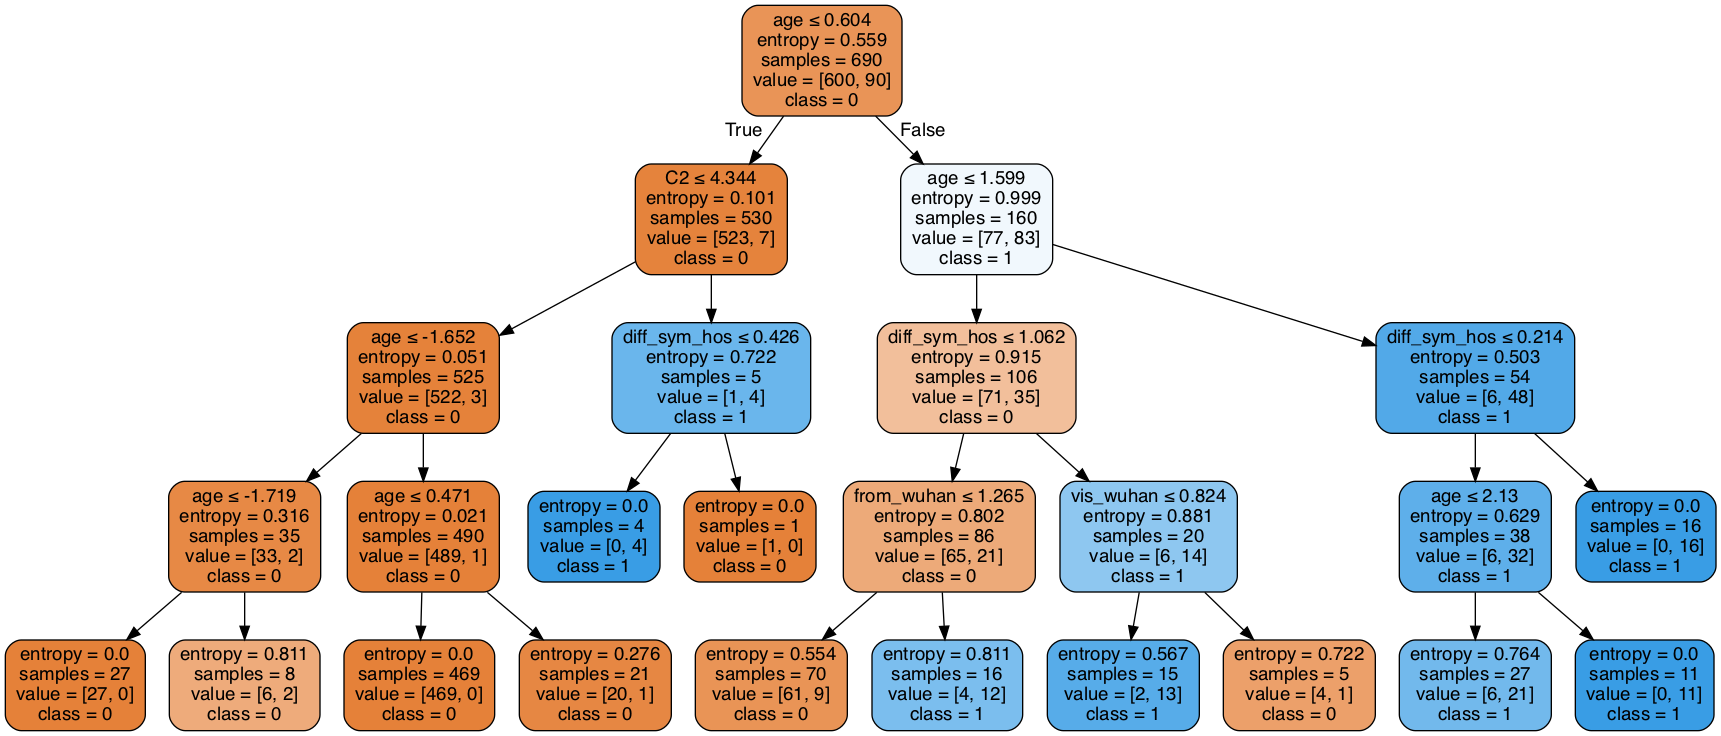

In [56]:
Feat=['L45','L85','C13','C2','age','vis_wuhan','from_wuhan','symptom1','diff_sym_hos']
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Feat,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Covid.png')
Image(graph.create_png())

# Gini(default)

#### finding the maximum depth using cross validation.

In [57]:
Maxdepth_List = list(range(1,10))
score_gini = []
for m in Maxdepth_List:
    classifierTree = DecisionTreeClassifier(max_depth=m,random_state=3)
    scores_gini = cross_val_score(classifierTree, x_train_tree, y_train_tree, cv=10, scoring='accuracy')
    score_gini.append(scores_gini.mean())
print(score_gini)
best_depth = Maxdepth_List[score_gini.index(max(score_gini))]
print('\nThe optimal number of levels is %d.' % best_depth)

[0.9347826086956521, 0.9362318840579711, 0.9376811594202898, 0.9492753623188406, 0.9521739130434783, 0.9478260869565217, 0.9434782608695652, 0.9449275362318842, 0.9507246376811596]

The optimal number of levels is 5.


#### Model training with depth 5 and using Gini index

In [58]:
GiniClass = DecisionTreeClassifier(max_depth=best_depth,random_state=3)
GiniClass.fit(x_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=5, random_state=3)

In [59]:
# calculate accuracy score of model
y_pred_gini = GiniClass.predict(x_test_tree)
accuracy_score(y_test_tree, y_pred_gini) 

0.930635838150289

### Draw Decision Tree with depth 5 based on the features selected

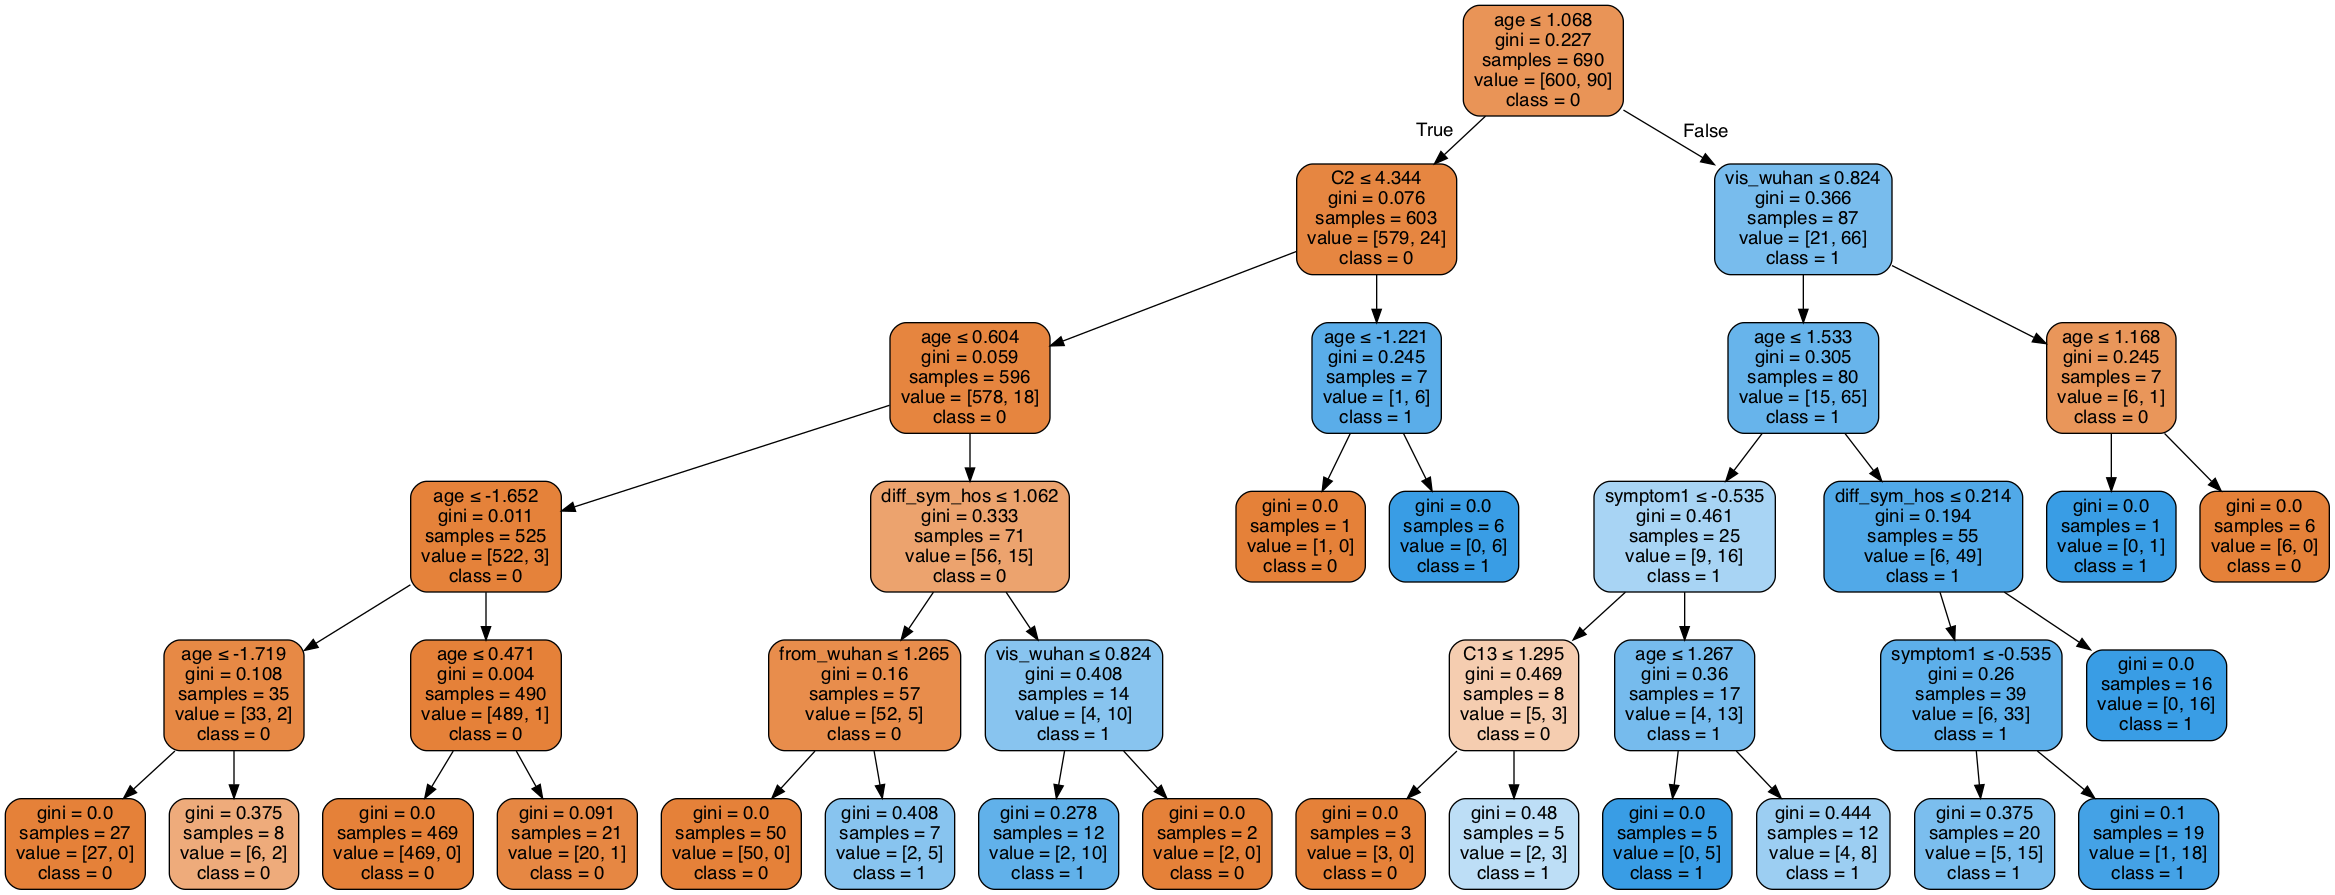

In [60]:
dot_data = StringIO()
export_graphviz(GiniClass, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Feat,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Covid.png')
Image(graph.create_png())

## We will choose the entropy as information gain rather tha gini index as it shows higher accuracy score.
###### model with entropy accuracy: 0.9421965317919075
###### model with gini index accuracy: 0.930635838150289

### Cross Validation check 

In [61]:
# 10-fold CV 
# Perform 10-fold cross validation.
# Crossvalscore evaluates a score by cross-validation 
# and returns an array of scores of the estimator (tree_classifier) for each run of the cross validation.
# Cross_val_score takes parameters the data to fit, labels, int to determine cross-validation splitting strategy
# and scoring (a str to determine model evaluation criteria)
scores_cv_tree = cross_val_score(tree_classifier, x_train_tree, y_train_tree, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores_cv_tree))
print('Average cross-validation score: {:.4f}'.format(scores_cv_tree.mean()))
#Our original model accuracy is 0.8843, but the mean cross-validation accuracy is 0.8725. 
#So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

Cross-validation scores:[0.95652174 0.95652174 0.98550725 0.95652174 0.95652174 0.97101449
 0.94202899 0.94202899 0.98550725 0.91304348]
Average cross-validation score: 0.9565


### Check for overfitting

In [62]:
print('Training set score: {:.4f}'.format(tree_classifier.score(x_train_tree, y_train_tree)))
print('Test set score: {:.4f}'.format(tree_classifier.score(x_test_tree, y_test_tree)))
#The training-set accuracy score is 0.9638 while the test-set accuracy to be 0.9422. 
#These two values are quite comparable. So, there is no sign of overfitting.

Training set score: 0.9638
Test set score: 0.9422


Data visualization of original test data


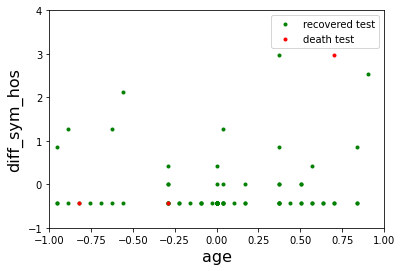

In [63]:
#plot original data
print('Data visualization of original test data')
plt.plot(x_test_tree[y_test_tree==0,4],x_test_tree[y_test_tree==0,8],'g.')
plt.plot(x_test_tree[y_test_tree==1,4],x_test_tree[y_test_tree==1,8],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-1,4)
plt.xlim(-1,1)
plt.legend(['recovered test','death test'],loc='upper right')

Data visualization of predicted data


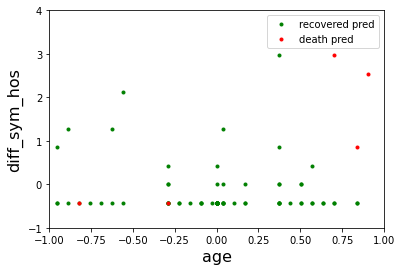

In [64]:
#plot predicted data
print('Data visualization of predicted data')
plt.plot(x_test_tree[y_pred_tree==0,4],x_test_tree[y_pred_tree==0,8],'g.')
plt.plot(x_test_tree[y_pred_tree==1,4],x_test_tree[y_pred_tree==1,8],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-1,4)
plt.xlim(-1,1)
plt.legend(['recovered pred','death pred'],loc='upper right')

## Model Evaluation

For a binary classification problem, we would have a 2 x 2 matrix 

                                        TN | FP
                                        -------
                                        FN | TP
                                       

In [65]:
print(confusion_matrix(y_test_tree, y_pred_tree))

[[149   6]
 [  4  14]]


- Precision refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives).

$$
    Precision = \frac{TP}{TP + FP}.
$$

- Recall is the measure of our model correctly identifying True Positives.It is the number of true positives divided by (the number of true positives plus the number of false negatives).

$$
    Recall = \frac{TP}{TP + FN}.
$$

- F1 score: Precision and Recall are the two building blocks of the F1 score. The goal of the F1 score is to combine the precision and recall metrics into a single metric.The F1 score is defined as the harmonic mean of precision and recall.

$$
    F1 = \frac{2 * precision * recall}{precision + recall}.
$$



In [67]:
# calculate accuracy
accuracy_tree = accuracy_score(y_test_tree, y_pred_tree)
print('Accuracy: %.3f' % accuracy_tree)
# calculate precision
precision_tree = precision_score(y_test_tree, y_pred_tree, average='binary')
print('Precision: %.3f' % precision_tree)
# calculate recall
recall_tree = recall_score(y_test_tree, y_pred_tree, average='binary')
print('Recall: %.3f' % recall_tree)
# calculate f1-score
score_tree = f1_score(y_test_tree, y_pred_tree, average='binary')
print('F-Measure: %.3f' % score_tree)

Accuracy: 0.942
Precision: 0.700
Recall: 0.778
F-Measure: 0.737


The ROC curve shows the trade-off between sensitivity (or TPR) and FPR (1 – specificity). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
To compare different classifiers, it can be useful to summarize the performance of each classifier into a single measure. One common approach is to calculate the area under the ROC curve, which is abbreviated to AUC.

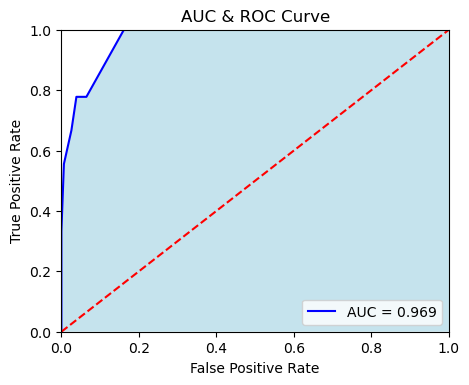

In [68]:
# predict probabilities
y_score_tree = tree_classifier.predict_proba(x_test_tree)
# keep probabilities for the positive outcome only (death) because this is a parameter for roc_curve
y_score_tree = y_score_tree[:, 1]
#calculate
fpr, tpr, threshold =  metrics.roc_curve(y_test_tree, y_score_tree)
#calculate auc
auc = metrics.roc_auc_score(y_test_tree, y_score_tree)
#plot
plt.figure(figsize=(5, 4), dpi=100)
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % auc)
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# -----SVM Classifier-----


## Feature Selection SVM

In [69]:
print("Before feature selection --> dimensions")
print(X.shape)
X_SVM = SelectKBest(f_classif , k=18).fit_transform(X,Y) 
#features selected are 
#1 (L45)
#2 (L44)
#8 (L85)
#9 (L117)
#20 (C18)
#22 (C13)
#24 (C12)
#26 (C11)
#35 (C2)
#40 (gender)
#41 (age)
#42 (vis_wuhan)
#43 (from_wuhan)
#44 (symptom1)
#45 (symptom2)
#46 (symptom3)
#47 (symptom4)
#50 (diff_sym_hos)
print("After feature selection --> dimensions")
print(X_SVM.shape)

Before feature selection --> dimensions
(863, 51)
After feature selection --> dimensions
(863, 18)


## Splitting the data

In [70]:
# 80% training
# 20% test
x_train_SVM, x_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_SVM, Y, test_size=0.20,random_state=3)

## CV check without optimizing hyperparameters

In [71]:
from sklearn.svm import SVC
# checking accuracy of model without choosing parameters 
model_SVM = SVC()
# Perform 10-fold cross validation.
# Crossvalscore evaluates a score by cross-validation 
# and returns an array of scores of the estimator (model_SVM) for each run of the cross validation.
# Cross_val_score takes parameters the data to fit, labels, int to determine cross-validation splitting strategy
# and scoring (a str to determine model evaluation criteria)
scores_SVM = model_selection.cross_val_score(model_SVM, x_train_SVM, y_train_SVM, cv=10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores_SVM))
print("10-fold cross validation average accuracy: %.3f" % (scores_SVM.mean()))

Cross-validation scores:[0.91304348 0.95652174 0.94202899 0.92753623 0.95652174 0.94202899
 0.97101449 0.97101449 0.97101449 0.94202899]
10-fold cross validation average accuracy: 0.949


## GridSearchCV

#### Exhaustive search over specified parameter values for an estimator for getting optimum hyperparameters

In [72]:
# list that holds hyperparameter values
# C: The strength of the regularization is inversely proportional to C.
# gamma: kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
# kernel: the kernel type to be used in the algorithm
params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly','rbf','sigmoid']}
# model CV
clf_SVM=SVC()
clf_cv_SVM=GridSearchCV(clf_SVM,params,cv=10)
clf_cv_SVM.fit(x_train_SVM,y_train_SVM)
#printing best parameters and the accuracy of that model 
print("tuned hpyerparameters :(best parameters) ",clf_cv_SVM.best_params_)
print("accuracy :",clf_cv_SVM.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100, 'gamma': 1, 'kernel': 'linear'}
accuracy : 0.9681159420289858


##### We can see that choosing the right parameters resulted in better accuracy

## Implementing the model

In [73]:
# instantiate the model 
SVM_classifier = SVC(C= 100, gamma = 1, kernel= 'linear',probability=True)

# fit the model with data
SVM_classifier.fit(x_train_SVM,y_train_SVM)

y_pred_SVM=SVM_classifier.predict(x_test_SVM)

# Measure accuracy on test data 
acc_SVM = np.mean(y_pred_SVM == y_test_SVM)
print("Accuracy on test data = %.3f" % acc_SVM)

Accuracy on test data = 0.954


## Visualizations

Data visualization of original test data


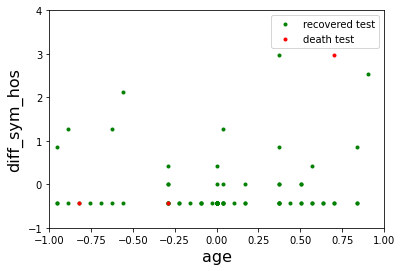

In [74]:
#plot original data
print('Data visualization of original test data')
plt.plot(x_test_SVM[y_test_SVM==0,10],x_test_SVM[y_test_SVM==0,17],'g.')
plt.plot(x_test_SVM[y_test_SVM==1,10],x_test_SVM[y_test_SVM==1,17],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-1,4)
plt.xlim(-1,1)
plt.legend(['recovered test','death test'],loc='upper right')

Data visualization of predicted data


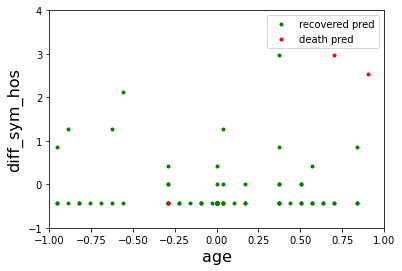

In [75]:
#plot predicted data
print('Data visualization of predicted data')
plt.plot(x_test_SVM[y_pred_SVM==0,10],x_test_SVM[y_pred_SVM==0,17],'g.')
plt.plot(x_test_SVM[y_pred_SVM==1,10],x_test_SVM[y_pred_SVM==1,17],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-1,4)
plt.xlim(-1,1)
plt.legend(['recovered pred','death pred'],loc='upper right')

SVM boundary for data


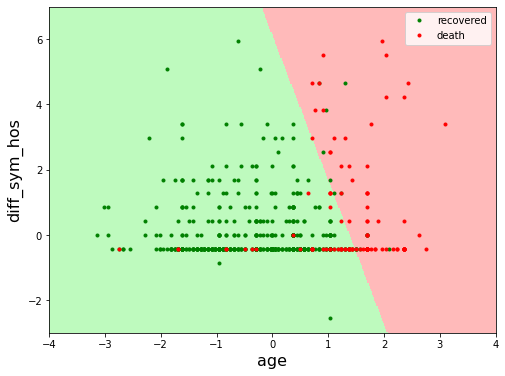

In [76]:
# decision boundary visualization
# code explained in details in knn classifier 
print ('SVM boundary for data')
cmap_light = ListedColormap(['#befabe','#ffbaba' ])
clf = SVC(C= 100, gamma = 1, kernel= 'linear',probability=True)
clf.fit(x_train_SVM[:,[10,17]], y_train_SVM)
age_min, age_max = X_SVM[:, 10].min() - 1, X_SVM[:, 10].max() + 1
diff_sym_hos_min, diff_sym_hos_max = X_SVM[:, 17].min() - 1, X_SVM[:, 17].max() + 1
age, sym = np.meshgrid(np.arange(age_min, age_max, 0.02),np.arange(diff_sym_hos_min, diff_sym_hos_max, 0.02))
Z = clf.predict(np.c_[age.ravel(), sym.ravel()])
Z = Z.reshape(age.shape)
plt.figure(figsize=(8, 6))
plt.pcolormesh(age, sym, Z, cmap=cmap_light,shading='auto')
plt.plot(X_SVM[Y==0,10],X_SVM[Y==0,17],'g.')
plt.plot(X_SVM[Y==1,10],X_SVM[Y==1,17],'r.')
plt.xlabel('age', fontsize=16)
plt.ylabel('diff_sym_hos', fontsize=16)
plt.ylim(-3,7)
plt.xlim(-4,4)
plt.legend(['recovered','death'],loc='upper right')
plt.show()

# Model Evaluation

For a binary classification problem, we would have a 2 x 2 matrix 

                                        TN | FP
                                        -------
                                        FN | TP
                                       

In [77]:
print(confusion_matrix(y_test_SVM, y_pred_SVM))

[[151   4]
 [  4  14]]


- Precision refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives).

$$
    Precision = \frac{TP}{TP + FP}.
$$

- Recall is the measure of our model correctly identifying True Positives.It is the number of true positives divided by (the number of true positives plus the number of false negatives).

$$
    Recall = \frac{TP}{TP + FN}.
$$

- F1 score: Precision and Recall are the two building blocks of the F1 score. The goal of the F1 score is to combine the precision and recall metrics into a single metric.The F1 score is defined as the harmonic mean of precision and recall.

$$
    F1 = \frac{2 * precision * recall}{precision + recall}.
$$




In [78]:
# calculate accuracy
SVM_accuracy = accuracy_score(y_test_SVM, y_pred_SVM)
print('Accuracy: %.3f' % SVM_accuracy)
# calculate precision
SVM_precision = precision_score(y_test_SVM, y_pred_SVM, average='binary')
print('Precision: %.3f' % SVM_precision)
# calculate recall
SVM_recall = recall_score(y_test_SVM, y_pred_SVM, average='binary')
print('Recall: %.3f' % SVM_recall)
# calculate f1-score
SVM_f1_score = f1_score(y_test_SVM, y_pred_SVM, average='binary')
print('F-Measure: %.3f' % SVM_f1_score)

Accuracy: 0.954
Precision: 0.778
Recall: 0.778
F-Measure: 0.778


The ROC curve shows the trade-off between sensitivity (or TPR) and FPR (1 – specificity). Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
To compare different classifiers, it can be useful to summarize the performance of each classifier into a single measure. One common approach is to calculate the area under the ROC curve, which is abbreviated to AUC.

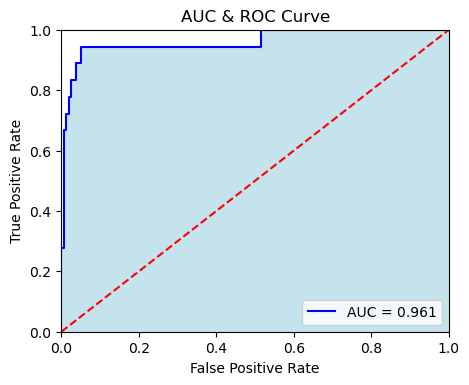

In [79]:
# plotting ROC using tpr, fpr 
# calculating AUC 

# predict probabilities
y_score_SVM = SVM_classifier.predict_proba(x_test_SVM)
# keep probabilities for the positive outcome only (death) beacuse this is a parameter for roc_curve
y_score_SVM = y_score_SVM[:, 1]
#calculate
fpr, tpr, threshold =  metrics.roc_curve(y_test_SVM, y_score_SVM)
# calculate auc
auc = metrics.roc_auc_score(y_test_SVM, y_score_SVM)
#plot
plt.figure(figsize=(5, 4), dpi=100)
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % auc)
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# -----Comparison-----

## Accuracy

<BarContainer object of 5 artists>

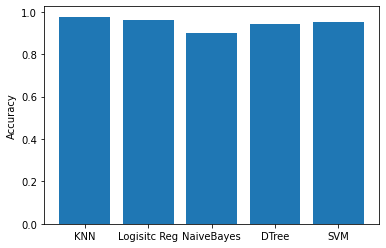

In [84]:
accuracy_graph = {'KNN':knn_accuracy,'Logisitc Reg': log_accuracy,'NaiveBayes': bay_accuracy, 
             'DTree': accuracy_tree,'SVM':SVM_accuracy}

acc_keys = list(accuracy_graph.keys())
acc_scores = list(accuracy_graph.values())
plt.ylabel("Accuracy")
plt.bar(acc_keys,acc_scores)

## Precision

<BarContainer object of 5 artists>

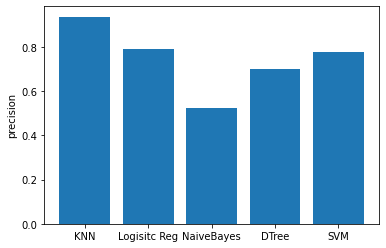

In [81]:
precision_graph = {'KNN':knn_precision,'Logisitc Reg': log_precision,'NaiveBayes': bay_precision, 
             'DTree': precision_tree,'SVM':SVM_precision}

precision_keys = list(precision_graph.keys())
precision_scores = list(precision_graph.values())
plt.ylabel("precision")
plt.bar(precision_keys,precision_scores)

## f1-score

<BarContainer object of 5 artists>

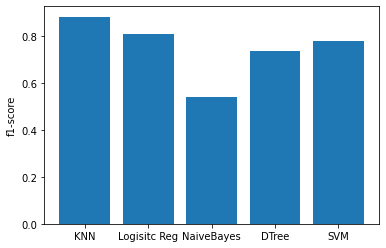

In [82]:
f1_graph = {'KNN':knn_f1_score,'Logisitc Reg': log_f1_score,'NaiveBayes': bay_f1_score, 
             'DTree': score_tree,'SVM':SVM_f1_score}

f1_keys = list(f1_graph.keys())
f1_scores = list(f1_graph.values())
plt.ylabel("f1-score")
plt.bar(f1_keys,f1_scores)

## Recall

<BarContainer object of 5 artists>

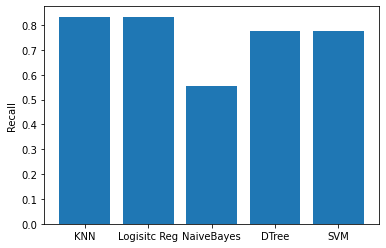

In [83]:
recall_graph = {'KNN':knn_recall,'Logisitc Reg': log_recall,'NaiveBayes': bay_recall, 
             'DTree': recall_tree,'SVM':SVM_recall}

recall_keys = list(recall_graph.keys())
recall_scores = list(recall_graph.values())
plt.ylabel("Recall")
plt.bar(recall_keys,recall_scores)

### It can be concluded that across all ROC_AUC graphs KNN was the best one with the highest score. Also KNN has the highest accuracy, precision, f1-score so overall KNN was the best model for this dataset 